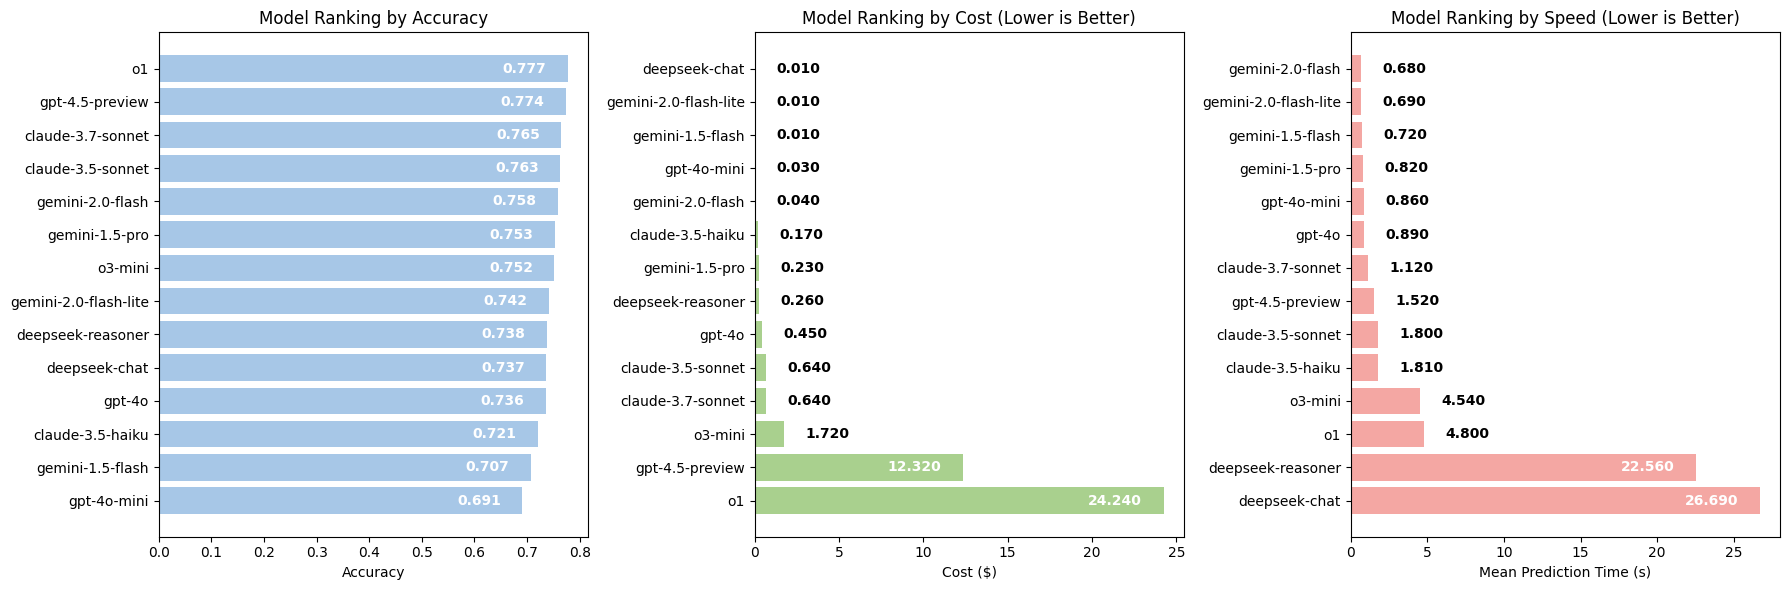

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ["gpt-4o","gpt-4.5-preview","o1","gpt-4o-mini","o3-mini","claude-3.5-sonnet","claude-3.7-sonnet","claude-3.5-haiku","deepseek-chat","deepseek-reasoner","gemini-2.0-flash","gemini-2.0-flash-lite","gemini-1.5-pro","gemini-1.5-flash"]
accuracy = [0.736, 0.774, 0.777, 0.691, 0.752, 0.763, 0.765, 0.721, 0.737, 0.738, 0.758, 0.742, 0.753, 0.707]
cost = [0.45, 12.32, 24.24, 0.03, 1.72, 0.64, 0.64, 0.17, 0.01, 0.26, 0.04, 0.01, 0.23, 0.01]
speed = [0.89, 1.52, 4.8, 0.86, 4.54, 1.8, 1.12, 1.81, 26.69, 22.56, 0.68, 0.69, 0.82, 0.72]  # Mean Prediction Time

# Convert to DataFrame
df = pd.DataFrame({"Model": models, "Accuracy": accuracy, "Cost": cost, "Speed": speed})

# Remove missing cost values for cost ranking
df_cost = df.dropna(subset=["Cost"])

# Sorting data
df_sorted_accuracy = df.sort_values(by="Accuracy", ascending=False)
df_sorted_cost = df_cost.sort_values(by="Cost", ascending=True)  # Lower cost is better
df_sorted_speed = df.sort_values(by="Speed", ascending=True)  # Lower speed is better

# Define one pastel color per chart
color_accuracy = "#A7C7E7"  # Light Blue
color_cost = "#A9D08E"  # Light Green
color_speed = "#F4A7A3"  # Light Red

# Plot settings
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

def add_labels(ax, bars):
    """Add numerical values inside or outside bars based on bar width."""
    for bar in bars:
        value = bar.get_width()
        position = bar.get_x() + value  # Text position
        if value > max(ax.get_xlim()) * 0.30:  # If bar is wide enough, place the text inside
            ax.text(position - 0.05 * max(ax.get_xlim()), bar.get_y() + bar.get_height()/2,
                    f'{value:.3f}', ha='right', va='center', fontsize=10, color='white', fontweight='bold')
        else:  # Place text outside for very small bars
            ax.text(position + 0.05 * max(ax.get_xlim()), bar.get_y() + bar.get_height()/2,
                    f'{value:.3f}', ha='left', va='center', fontsize=10, color='black', fontweight='bold')

# Accuracy Bar Chart
bars = axes[0].barh(df_sorted_accuracy["Model"], df_sorted_accuracy["Accuracy"], color=color_accuracy)
axes[0].set_xlabel("Accuracy")
axes[0].set_title("Model Ranking by Accuracy")
axes[0].invert_yaxis()  # Highest at top
add_labels(axes[0], bars)

# Cost Bar Chart
bars = axes[1].barh(df_sorted_cost["Model"], df_sorted_cost["Cost"], color=color_cost)
axes[1].set_xlabel("Cost ($)")
axes[1].set_title("Model Ranking by Cost (Lower is Better)")
axes[1].invert_yaxis()
add_labels(axes[1], bars)

# Speed Bar Chart
bars = axes[2].barh(df_sorted_speed["Model"], df_sorted_speed["Speed"], color=color_speed)
axes[2].set_xlabel("Mean Prediction Time (s)")
axes[2].set_title("Model Ranking by Speed (Lower is Better)")
axes[2].invert_yaxis()
add_labels(axes[2], bars)

plt.tight_layout()
plt.show()
